# Lab07 - Data Preprocessing II
#### Name: Matt McLaughlin 
#### Class: CSCI 349 - Intro to Data Mining 
#### Semester: 2020SP 
#### Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### 1) [P] Create a Python function called process_FAA_hourly_data that takes a filename (with path) as a string, and returns a completely processed pandas data frame, ready for analysis. It should do everything that the previous lab did to clean the file, including
#### a. converting all numeric variables to their simplest numeric types
#### b. converting the date/time stamp (first variable) to a pandas DatetimeIndex, which becomes the actual index for the data frame. (It should drop the date time variable after moving it to become the index.)
#### c. If you did not do this in the last lab, make sure that the DatetimeIndex is localized to a specific timezone! This is very important! What time zone? Did you notice the header? The time stamp is in GMT, so be sure to localize the index accordingly. HOW? After you set up the index, you can do: df.index = df.index.tz_localize(tz='GMT')
#### NOTE: The last exercise in the previous lab had you eliminate a year from the data for the very last problem. Do NOT do that here! We'll explore that again later.

In [2]:
def process_FAA_hourly_data(filepath):
    
    # Read CSV file into DataFrame - #1
    df_temps = pd.read_csv(filepath_or_buffer=filepath, skiprows=16)
    
    # Remove extra column headers throughout the DataFrame - #5
    fc = df_temps.columns[0]
    df_temps = df_temps[df_temps[fc] != fc]
    
    # Reset index - # 7
    df_temps = df_temps.reset_index(drop=True)
    
    # Drop last column - #9
    df_temps = df_temps.iloc[:,0:-2]

    # Downcast types to less memory usage - #10/11
    df_temps.iloc[:,1] = pd.to_numeric(arg=df_temps.iloc[:,1], downcast='integer')
    for i in range(2, len(df_temps.columns)):
        df_temps.iloc[:,i] = pd.to_numeric(arg=df_temps.iloc[:,i], downcast='float')
    
    # Convert date/time column to DateTime data type - #26
    df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])
    
    # Set DateTime to be index of DataFrame - #28
    df_temps = df_temps.set_index(df_temps.columns[0])
    df_temps.tz_localize("GMT")  #I would have preferred not to hardcode GMT

    return df_temps

**2) [P] Use your new function to read in the KIPT data file you downloaded in the last lab. Store your data frame
as df_kipt. Output the results of info() and describe() to confirm you read it in correctly.**

In [3]:
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20000101-20191231_raw.csv")
df_kipt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173252 entries, 2000-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 11 columns):
Number of Observations (n/a)     173252 non-null int8
Average Temp (F)                 172253 non-null float32
Max Temp (F)                     172253 non-null float32
Min Temp (F)                     172253 non-null float32
Average Dewpoint Temp (F)        172147 non-null float32
1 Hour Precip (in)               28934 non-null float32
Max Wind Gust (mph)              23544 non-null float32
Average Relative Humidity (%)    168754 non-null float32
Average Wind Speed (mph)         172710 non-null float32
Average Station Pressure (mb)    172974 non-null float32
Average Wind Direction (deg)     140590 non-null float32
dtypes: float32(10), int8(1)
memory usage: 8.1 MB


In [4]:
df_kipt.describe()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg)
count,173252.000000,172253.000000,172253.000000,172253.000000,172147.000000,28934.000000,23544.000000,168754.000000,172710.000000,172974.000000,140590.000000
mean,1.339915,51.286217,51.399208,51.179626,40.253628,0.030566,22.295341,68.819511,5.904806,1016.741272,176.806366
std,0.854852,18.888988,18.907930,18.881851,19.053423,0.079247,7.581788,19.694031,5.192565,7.640043,118.790619
min,0.000000,-11.900000,-11.900000,-11.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,508.600006,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.830000,0.000000,19.600000,54.000000,0.000000,1012.200012,70.000000
50%,1.000000,52.000000,52.000000,51.799999,41.000000,0.000000,21.900000,71.000000,5.370000,1016.900024,220.000000
75%,1.000000,66.900002,66.900002,66.900002,57.000000,0.030000,26.500000,86.000000,9.200000,1021.700012,280.000000
max,10.000000,102.000000,102.000000,102.000000,79.000000,2.350000,88.599998,100.000000,76.000000,1044.400024,360.000000


**3) [P] In the last lab, you assessed the number of missing dates in your data, under the assumption that every
hour should have an observation. For now, we'll leave the fact that there are completely missing hourly
observations from the weather station. This time, report the number of missing values in each variable of
df_kipt. (HINT: One way is to use the isna() method.)**

In [5]:
df_kipt.isna().sum()

Number of Observations (n/a)          0
Average Temp (F)                    999
Max Temp (F)                        999
Min Temp (F)                        999
Average Dewpoint Temp (F)          1105
1 Hour Precip (in)               144318
Max Wind Gust (mph)              149708
Average Relative Humidity (%)      4498
Average Wind Speed (mph)            542
Average Station Pressure (mb)       278
Average Wind Direction (deg)      32662
dtype: int64

**4) [M] Which variables seem to have the most consistent, complete observations? Which are missing the most?
Are they really "missing", or are they observations where an event did not occur? Discuss.**

####  The most complete observations are "Average Station Pressure (mb)" and "Average Wind Speed (mph)", while the most consistent are "Average Temp (F)", "Max Temp (F)", and "Min Temp (F)". 
#### "Max Wind Gust" and "1 Hour Precip" are missing the most data. For MWG I believe there was probably some kind of error in reporting (bad algorithms to calculate max or something), and for "1HP" it is possible the measuring device is faulty.

**5) [P/M] Ignore the date, and report the frequency over hours that have missing "Average Temp (F)"
values. Be sure to report the LOCAL times according to the time zone "US/Eastern". Output the hours in
order of the most frequent to least. Then, as a comment, just interpret what you see. Do you see a pattern?
Do missing temps tend to happen at a certain time of day?
(HINT: This might be challenging. First, as always, select the subset of your data matching your criteria. Then,
for these data, look at the index. Date / time values have LOTS of attributes themselves... such as hour.
What do you get if you count these values?)**

In [6]:
#For convenience's sake ##############################################################
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20000101-20191231_raw.csv")
######################################################################################

#Report frequency of missing data per hour, from greatest to least
nan_count_hourly = pd.Series(name="nan count hourly", index=range(24), data=np.zeros(24))

av_temp = df_kipt["Average Temp (F)"]
av_temp.index = av_temp.index.hour

i = 0
for x in av_temp:
    #x is a float type (the temp data)
    if math.isnan(x):
        nan_count_hourly[i] = nan_count_hourly[i] + 1 
    i = (i + 1)%24
    
    
freq_arr = nan_count_hourly / df_kipt.shape[0]
freq_arr.name = "Frequency of NaN, hourly"

freq_arr_sorted = freq_arr.sort_values(ascending=False)
freq_arr_sorted.name="Frequency of NaN, hourly, sorted"

freq_arr_sorted

17    0.000289
6     0.000260
18    0.000260
8     0.000260
13    0.000260
5     0.000254
19    0.000254
12    0.000254
14    0.000248
7     0.000242
11    0.000237
10    0.000237
9     0.000237
0     0.000237
16    0.000237
15    0.000231
20    0.000231
2     0.000231
23    0.000231
22    0.000219
21    0.000219
3     0.000219
1     0.000214
4     0.000208
Name: Frequency of NaN, hourly, sorted, dtype: float64

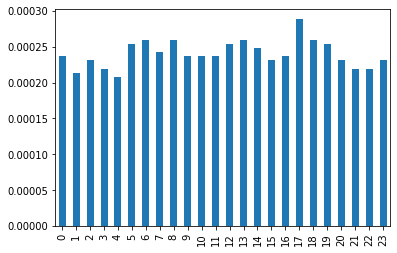

In [7]:
freq_arr.plot(kind='bar')

#### I can not see much of a pattern. The frequency of missing data seems to rise and fall in a vaguely sinusoidal fashion. The values are all relatively close and there is no clustering to suggest there is high loss at night, around noon, etc.

**6) [P/M] Repeat the previous exercise, but this time, assess the same variable for the day of the week. (NOTE: Be
sure to note what a 0 is. In pandas, a 0 for day of the week is a Monday! (See
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html )**

In [8]:
#For convenience's sake ##############################################################
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20000101-20191231_raw.csv")
######################################################################################

#Report frequency of missing data per hour, from greatest to least
nan_count_daily = pd.Series(name="nan count daily", index=range(7), data=np.zeros(7))

av_temp = df_kipt["Average Temp (F)"]
av_temp.index = av_temp.index.dayofweek

i = 0
for x in av_temp:
    #x is a float type (the temp data)
    if math.isnan(x):
        nan_count_daily[i] = nan_count_daily[i] + 1 
    i = (i + 1)%7
    

#Day names are nicer to look at
nan_count_daily.index = ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]
freq_arr = nan_count_daily / df_kipt.shape[0]
freq_arr.name = "Frequency of NaN, daily"

freq_arr_sorted = freq_arr.sort_values(ascending=False)
freq_arr_sorted.name="Frequency of NaN, daily, sorted"

freq_arr_sorted

Mo    0.000854
Sa    0.000831
We    0.000831
Fr    0.000825
Su    0.000814
Tu    0.000808
Th    0.000802
Name: Frequency of NaN, daily, sorted, dtype: float64

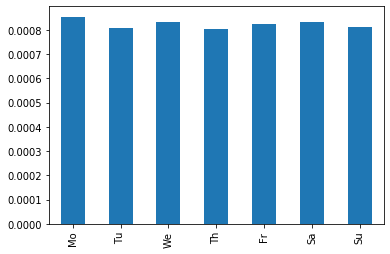

In [9]:
freq_arr.plot(kind="bar")

#### Again, I see a fairly uniform distribution and no obvious trend in missing data frequency among days of the week.

**Next, let's suppose your supervisor suggests that you grab similar data from a nearby station. How?**

**7) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file,
but a tab separated file. Store the data frame as stations. Show stations.info() after you read in the data.**

In [10]:
stations = pd.read_csv("../data/FAA_PA_stations.csv", sep='\t')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
ID                  46 non-null object
Name                46 non-null object
County              45 non-null object
State               46 non-null object
Lat                 46 non-null float64
Lon                 46 non-null float64
Elevation (feet)    46 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


**8) [P] As usual, you must always assess your missing data, if any. Are there any observations (rows) that have
missing data? Output them, and eliminate them from your data. Be sure to reset_index(drop=True) to
reset the index in case any observations are dropped. Output stations.info() again.**

In [11]:
stations = stations.dropna()
stations = stations.reset_index(drop=True)
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
ID                  45 non-null object
Name                45 non-null object
County              45 non-null object
State               45 non-null object
Lat                 45 non-null float64
Lon                 45 non-null float64
Elevation (feet)    45 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


**9) [P] Examine the data frame of stations by showing the first few observations using
stations.head(10) In particular, pay close attention to the variables Lat and Lon. These represent the
precise latitude and longitude geolocation for the weather station.**

In [12]:
stations.head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0
7,KDYL,DOYLESTOWN,BUCKS,PA,40.33,-75.12,394.0
8,KDUJ,DUBOIS,JEFFERSON,PA,41.18,-78.90,1814.0
9,KERI,ERIE,ERIE,PA,42.08,-80.17,730.0


**10) Create a new variable in stations called "distKIPT" that stores the distance of every station in PA to
Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute
the distance between the stations. As a reminder, Euclidean distance between two points defined by (x1, y1)
and (x2, y2) is:**

In [13]:
def euclid_dist_KIPT(x):
    #x1 = Lat, y1 = Lon
    #Location of KIPT is 41.240 -76.920
    return math.sqrt( pow(x.Lat - 41.240, 2) + pow(x.Lon + 76.920, 2) )

    
stations["distKIPT"] = stations.apply(euclid_dist_KIPT, axis=1)
stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0,3.501685
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0,1.808867
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0,3.066235


**11) [P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations
should be listed in order of increasing distance from KIPT.**

In [14]:
sts_dist_kipt = stations.sort_values(by="distKIPT")
sts_dist_kipt = sts_dist_kipt.loc[:,["ID","distKIPT"]]
sts_dist_kipt.head(10)

,ID,distKIPT
29,KIPT,0.000000
26,KSEG,0.424264
18,KMUI,0.882383
27,KUNV,1.008464
5,KCXY,1.022399
16,KMDT,1.062121
25,KAVP,1.203370
13,KLNS,1.285029
24,KRDG,1.295569
31,KTHV,1.320947


**12) [P] Using your results, go back to the PSU climate website ( http://climate.met.psu.edu/data/ida/ ), and
download the faa_hourly data for the THREE closest stations that have hourly data available in the same date
range as the data you downloaded from KIPT (i.e. 20000101-20191231). (HINT: You may need to skip a station
because it does not have data available in this range.) Copy the data into your data folder. Then, read in each
data file into its own data frame using your function. You should have four data frames: df_kipt, and three
other data frames representing the three closest stations. Show the result of info() on your three new data
frames. (HINT: KSEG, KUNV, KCXY)**

In [15]:
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20000101-20191231_raw.csv")
df_kseg = process_FAA_hourly_data("../data/faa_hourly-KSEG_20000101-20191231_raw.csv")
df_kunv = process_FAA_hourly_data("../data/faa_hourly-KUNV_20000101-20191231_raw.csv")
df_kcxy = process_FAA_hourly_data("../data/faa_hourly-KCXY_20000101-20191231_raw.csv")

In [16]:
df_kseg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172179 entries, 2000-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 11 columns):
Number of Observations (n/a)     172179 non-null int8
Average Temp (F)                 171579 non-null float32
Max Temp (F)                     171579 non-null float32
Min Temp (F)                     171579 non-null float32
Average Dewpoint Temp (F)        171386 non-null float32
1 Hour Precip (in)               26631 non-null float32
Max Wind Gust (mph)              18401 non-null float32
Average Relative Humidity (%)    167855 non-null float32
Average Wind Speed (mph)         171396 non-null float32
Average Station Pressure (mb)    171931 non-null float32
Average Wind Direction (deg)     123311 non-null float32
dtypes: float32(10), int8(1)
memory usage: 8.0 MB


In [17]:
df_kunv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168630 entries, 2000-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 11 columns):
Number of Observations (n/a)     168630 non-null int8
Average Temp (F)                 167310 non-null float32
Max Temp (F)                     167310 non-null float32
Min Temp (F)                     167310 non-null float32
Average Dewpoint Temp (F)        167299 non-null float32
1 Hour Precip (in)               7505 non-null float32
Max Wind Gust (mph)              32070 non-null float32
Average Relative Humidity (%)    162847 non-null float32
Average Wind Speed (mph)         168298 non-null float32
Average Station Pressure (mb)    167219 non-null float32
Average Wind Direction (deg)     151713 non-null float32
dtypes: float32(10), int8(1)
memory usage: 7.9 MB


In [18]:
df_kcxy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127229 entries, 2000-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 11 columns):
Number of Observations (n/a)     127229 non-null int8
Average Temp (F)                 126767 non-null float32
Max Temp (F)                     126767 non-null float32
Min Temp (F)                     126767 non-null float32
Average Dewpoint Temp (F)        126630 non-null float32
1 Hour Precip (in)               17548 non-null float32
Max Wind Gust (mph)              14922 non-null float32
Average Relative Humidity (%)    123356 non-null float32
Average Wind Speed (mph)         127026 non-null float32
Average Station Pressure (mb)    126624 non-null float32
Average Wind Direction (deg)     115184 non-null float32
dtypes: float32(10), int8(1)
memory usage: 5.9 MB


**You're going to repair our KIPT data, but how? There are many approaches. Since we have data from nearby
stations with independent readings, let's see how many of our missing data can be filled in from a nearby station.
Again, for simplicity, we're only going to focus on average temperature (column 1).
As an advanced CS elective, you should be going for efficient, clean code. It need not be perfect, but it should be
well-thought out and documented so you can readily show it to prospective employers, and also use it later!
Remember - you are going to start doing more advanced analyses very soon! So, when your code or your output is
not obvious or intuitive, write markdown after your output is generated that explains your code, and interprets
your results!**

**13) [P] Create a new data frame called df_ave_temps that contains the average temperature from all four
stations. Name the variables with the four-letter station identifier (e.g. "KIPT"). The index should have a
COMPLETE hourly date range from the start date "20000101 00:00:00 GMT" to finish date
"20191231 23:00:00 GMT". The results should be a complete dataset with an observation for every
hour. If hourly observations are missing from the station you are copying from, then a NaN value should be
stored for that entry. You will use these data for the remainder of this exercise.
Show df_ave_temps.info()**

In [19]:
index=pd.date_range(start=pd.to_datetime("01/01/2000 00:00:00"), end=pd.to_datetime("12/31/2019 23:00:00"), freq="H")

kipt_ser = pd.Series(df_kipt["Average Temp (F)"], name="KIPT", index=index)
kseg_ser = pd.Series(df_kseg["Average Temp (F)"], name="KSEG", index=index)
kunv_ser = pd.Series(df_kunv["Average Temp (F)"], name="KUNV", index=index)
kcxy_ser = pd.Series(df_kcxy["Average Temp (F)"], name="KCXY", index=index)

d = {'KIPT':kipt_ser, 'KSEG':kseg_ser, 'KUNV':kunv_ser, 'KCXY':kcxy_ser}

df_ave_temps = pd.DataFrame(d)

df_ave_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2000-01-01 00:00:00 to 2019-12-31 23:00:00
Freq: H
Data columns (total 4 columns):
KIPT    172253 non-null float32
KSEG    171579 non-null float32
KUNV    167310 non-null float32
KCXY    126767 non-null float32
dtypes: float32(4)
memory usage: 9.0 MB



**14) [P] Report the number of observations that have missing temps for each location. You should output a
DataFrame or Series that shows four values.**

In [20]:
#This is a Series object
df_ave_temps.isna().sum()

KIPT     3067
KSEG     3741
KUNV     8010
KCXY    48553
dtype: int64

**15) [P] Report the number of missing data in KIPT that have at least one alternative station with an existing value.
You should output a statement like, "There are XXXX out of XXXX values in KIPT that
can be restored from other locations." Also, show the first 10 observations of these data
that meet this criteria using head(10).**

In [21]:
#[DateTime][kipt.isna()][T/F replaceable][list names][list values]

#Replaceable is a Series where a DateTime will be True IF KIPT is NaN and one of the other is a number
replaceable = pd.Series(index=index, data=False, name="Replaceable")
list_names = pd.Series(index=index, data=None, name="Replaceable by")
list_values = pd.Series(index=index, data=None, name="Replaceable values")

for x in index:
    if math.isnan(kipt_ser.at[x]):
        if not (math.isnan(kseg_ser.at[x]) or math.isnan(kunv_ser.at[x]) or math.isnan(kcxy_ser.at[x])):
            replaceable.at[x] = True
            list_names[x] = ""
            list_values[x] = ""

            if not math.isnan(kseg_ser.at[x]):
                list_names[x] += "KSEG\n"
                list_values[x] += str(kseg_ser[x]) + "\n"

            if not math.isnan(kunv_ser.at[x]):
                list_names[x] += "KUNV\n"
                list_values[x] += str(kunv_ser[x]) + "\n"
                    
            if not math.isnan(kcxy_ser.at[x]):
                list_names[x] += "KCXY"
                list_values[x] += str(kcxy_ser[x])


d = {'KIPT NaN':kipt_ser.isna(), 'Replaceable':replaceable, 'Replaceable by':list_names, 'Replaceable values':list_values}

#Keep this line in case I want the whole index range for some reason
df_replaceable = pd.DataFrame(d)

#Not doing this from the start was wasteful but I'm not willing to fix it right now.
df_replaceable = df_replaceable[df_replaceable["KIPT NaN"]]

#### I feel like I'm making this harder than it has to be, but here's a demonstration of how my DataFrame works.

In [22]:
df_replaceable.head()

,KIPT NaN,Replaceable,Replaceable by,Replaceable values
2000-01-03 18:00:00,True,False,NaN,NaN
2000-01-05 17:00:00,True,False,NaN,NaN
2000-01-06 20:00:00,True,False,NaN,NaN
2000-01-07 14:00:00,True,True,KSEG\nKUNV\nKCXY,36.0\n35.6\n35.6
2000-01-10 02:00:00,True,False,NaN,NaN


In [23]:
df_replaceable.loc["2000-01-07 14:00:00",:]

KIPT NaN                          True
Replaceable                       True
Replaceable by        KSEG\nKUNV\nKCXY
Replaceable values    36.0\n35.6\n35.6
Name: 2000-01-07 14:00:00, dtype: object

In [24]:
print(df_replaceable.loc["2000-01-07 14:00:00","Replaceable values"])

36.0
35.6
35.6


In [25]:
df_replaceable.sum()

KIPT NaN       3067
Replaceable     859
dtype: int64

In [26]:
print("\nThere are " + str(replaceable.sum()) + " out of " + str(kipt_ser.isna().sum()) + " values in KIPT that can be restored from other locations")


There are 859 out of 3067 values in KIPT that can be restored from other locations


**16) [P] Remember that exercise in the previous lab that gathered the number of missing data by year? Report the
number of missing data in KIPT by year that CANNOT be restored from any of the other stations. What year is
standing out as the least likely to be restored?**

In [27]:
df_rep_2 = df_replaceable.loc[:,["KIPT NaN","Replaceable"]].resample('Y').sum()
df_rep_2["# Not Replaceable"] = df_rep_2["KIPT NaN"].sub(df_rep_2["Replaceable"], axis=0)
df_rep_2

,KIPT NaN,Replaceable,# Not Replaceable
2000-12-31,832.0,20.0,812.0
2001-12-31,84.0,2.0,82.0
2002-12-31,200.0,51.0,149.0
2003-12-31,143.0,2.0,141.0
2004-12-31,154.0,60.0,94.0
2005-12-31,130.0,15.0,115.0
2006-12-31,42.0,0.0,42.0
2007-12-31,75.0,8.0,67.0
2008-12-31,203.0,15.0,188.0
2009-12-31,93.0,17.0,76.0


In [28]:
bad_year = df_rep_2["# Not Replaceable"].idxmax().year
print(str(bad_year) + " is the year with the most unreplaceable data.")

2000 is the year with the most unreplaceable data.


**17) [P] It still looks like one year in particular is pretty bad. Confirm this visually by creating a line plot that plots all four stations for that one year, with each station a different color. Make sure KIPT stands out in some way.
Only show the data for that one year you answered in the previous exercise. Interpret your results. In
particular, do you see any other problems from any stations? (This might be a good time to use an interactive
data visualization tool such as Plotly!) Label your plot (e.g. title, axis, legend)**

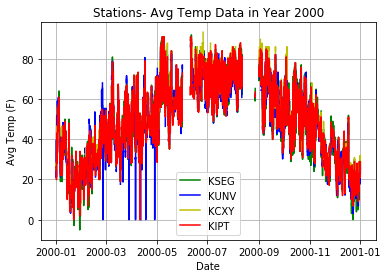

In [29]:
#Originally did it with MatPlotLib. Trying it with plotly below.
ind_2000 = pd.date_range(start=pd.to_datetime("01/01/2000 00:00:00"), end=pd.to_datetime("12/31/2000 23:00:00"), freq="H")

#Select data for year 2000
kipt_temp_2000 = kipt_ser[:"12/31/2000 23:00:00"]
kseg_temp_2000 = kseg_ser[:"12/31/2000 23:00:00"]
kunv_temp_2000 = kunv_ser[:"12/31/2000 23:00:00"]
kcxy_temp_2000 = kcxy_ser[:"12/31/2000 23:00:00"]

#plot
#I'm not sure I'm plotting the right things here. Reconsider.
plt.plot(ind_2000, kseg_temp_2000, 'g', label="KSEG")
plt.plot(ind_2000, kunv_temp_2000, 'b', label="KUNV")
plt.plot(ind_2000, kcxy_temp_2000, 'y', label="KCXY")
plt.plot(ind_2000, kipt_temp_2000, 'r', label="KIPT")

plt.grid()
plt.ylabel("Avg Temp (F)")
plt.xlabel("Date")
plt.title("Stations- Avg Temp Data in Year 2000")
plt.legend()
plt.show()

In [ ]:
#Trying it with plotly
# https://plot.ly/python/line-charts/
#https://plot.ly/python/figure-labels/

import plotly.graph_objects as go


# Create traces
fig = go.Figure()
#If I wanted to simplify/use less detail I could use 
#fig.add_trace(go.Scatter(x=ind_2000, y=kseg_temp_2000.resample('4D').mean(), mode='lines', name='KSEG'))
#The resampling will mean less detail on the plot
fig.add_trace(go.Scatter(x=ind_2000, y=kseg_temp_2000, mode='lines', name='KSEG'))
fig.add_trace(go.Scatter(x=ind_2000, y=kunv_temp_2000, mode='lines', name='KUNV'))
fig.add_trace(go.Scatter(x=ind_2000, y=kcxy_temp_2000, mode='lines', name='KCXY'))
fig.add_trace(go.Scatter(x=ind_2000, y=kipt_temp_2000, mode='lines', name='KIPT'))

fig.update_layout(title="Stations- Avg Temp Data in Year 2000", xaxis_title="Date", yaxis_title="Avg Temp (F)")
fig.show()


#### I didn't like learning different visual tools in lab05, but this graph was fairly easy and looks *much* better than my first.
#### KUNV stands out for having several extreme dips.

**18) [P] Looking at your plot of 2000 over all stations should reveal that KUNV is problematic at 6 different times.
Report these observations, but report them from your full KUNV dataframe. Show only those observations.**

In [31]:
#Supposed to use df_kunv

kt2b = df_kunv.loc[:"12/31/2000 23:00:00","Average Temp (F)"]
kt2b = kt2b[kt2b == 0]
kt2b
#kunv_temp_2000_b = kunv_temp_2000[(kunv_temp_2000 == 0)]
#kunv_temp_2000_b

Date/Time (GMT)
2000-02-26 13:00:00    0.0
2000-03-28 14:00:00    0.0
2000-04-05 14:00:00    0.0
2000-04-11 22:00:00    0.0
2000-04-17 21:00:00    0.0
2000-04-28 15:00:00    0.0
Name: Average Temp (F), dtype: float32

**19) [M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into
NaN is not an acceptable solution. 0.0 may very well be a real value!**

#### We could use the IQR outlier formula but I feel it would be better to detect problems by comparing the change between one value to the next.
#### If a value is more than (50% and 20 degrees) different than it's predecessor we could define it as an outlier.

**20) [P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT. Look for peculiarities,
usually indicated by a sudden change that is outside of what would be considered normal, or an extreme
temperature reading that would be impossible to observe in reality. Then, document your findings of areas
that you think may be problematic, if any.**

In [ ]:
#df_kipt["Average Temp (F)"].plot()
#df_kipt["Average Temp (F)"].plot.line() #Same as above


# Takes an enormous time to run
fig2 = go.Figure()
for x in df_kipt.columns[1:4]:
    fig2.add_trace(go.Scatter(x=index, y=df_kipt[x], mode='lines', name=x))

fig2.update_layout(title="KIPT Data 2000-2019", xaxis_title="Date", yaxis_title="")
fig2.show()

#### I only included Avg, max, and min temps. 
#### On this scale it is difficult to see any obviously problematic areas. Additionally on this scale Avg, max, and min are basically the same line. As far I as can see all is well.

**21) [P] Compute a new Series that represents a running delta temperature between adjacent average
temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think
characterizes this distribution best. (HINT: It's a series of observations over a single numeric variable. What
type of plot can reveal the distribution of these data?)**

In [33]:
#This took a TON of debugging. There was a lot here that I deleted.
#Initialize Series
kipt_temp_delta = pd.Series(index=df_kipt.index, name="Avg Temp Change (F)", data=None)

prev=index[0]

for x in df_kipt.index[1:]:
    kipt_temp_delta[x] = df_kipt.loc[x,"Average Temp (F)"] - df_kipt.loc[prev,"Average Temp (F)"]
    prev = x

In [34]:
kipt_temp_delta.ne(0).sum()

140465

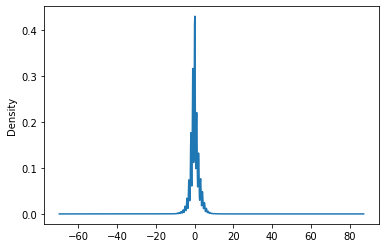

In [35]:
#What kind of plot?
#kipt_temp_delta.plot(kind='kde')
kipt_temp_delta.plot.density()

In [ ]:
##QQ plot isn't working. I'll come back to this.
import scipy.stats as stats
import statsmodels.api as sm

qq_data = kipt_temp_delta.sample(100)

#sm.qqplot(qq_data) #Comparison to normal is the default
#plt.title("QQ Plot: Ave Temp Delta Distribution vs Normal")
#plt.show()

**22) [P] Perhaps it's more important to select the station that has the most similar values. Write a function called
compare_station that takes two Series objects of numeric data, and computes the sum of the absolute
value of the difference between each pair of numbers in both Series. You should only sum the values that have
valid values for both entries. Return the average of these absolute differences.
Then, call compare_station on KIPT and each of the new station, but pass only the average temp vector
from each station using your df_ave_temps**

In [37]:
def compare_station(st_1, st_2):
    diff_ser = pd.Series(index=index,name="SAVD",data=None)
    
    for x in index: 
        a = st_1[x]
        b = st_2[x]
        if not (math.isnan(a) or math.isnan(b)):
            diff_ser[x] = abs(a - b)    
                     
    diff_ser = diff_ser[diff_ser.notna()] #Get rid of any lines that didn't have valid difference
    m = diff_ser.mean() #Find mean
    return m

In [38]:
compare_station(df_ave_temps["KIPT"], df_ave_temps["KCXY"])

3.7118515587105803

In [39]:
compare_station(df_ave_temps["KIPT"], df_ave_temps["KUNV"])

3.0005331820922634

In [40]:
compare_station(df_ave_temps["KIPT"], df_ave_temps["KSEG"])

2.0641876526393514

**23) [P] As we learned in class, you could compute a correlation coefficient between columns of data to determine
similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other
stations you downloaded. They should all be very close to 1, but not quite. What does this technique suggest
which station is most similar?**

In [41]:
#Not to self- I did not z score this beforehand. Apparently we were supposed to.
df_ave_temps.corr()["KIPT"]

KIPT    1.000000
KSEG    0.988329
KUNV    0.979906
KCXY    0.981163
Name: KIPT, dtype: float64

#### This suggests that KSEG is most similar to KIPT.

**24) [M] Interpret what you have observed so far. Which station is most similar? How would this affect your
approach to cleaning your data? Are there other things you might do to clean your data?**

#### According to 22, KSEG has the smallest difference in Avg Temp to KIPT. 
#### According to 23, KSEG has the highest covariance coefficient.
#### This means when cleaning my data I would use KSEG, or weight KSEG more heavily, etc.

**25) [P] Create a new attribute called KIPT_GOOD in your df_ave_temps data frame that keeps all of the
original average temp data, but takes the readings from the closest station with available data to replace in
the NA values. Be sure to replace the data from the best representative first, then the second best. Ignore the
third. When you perform data cleaning, NEVER DELETE YOUR ORIGINAL DATA! Either store it, or just create a
separate attribute of cleaned data, or create a separate data frame. AND, be sure to print out what you are
doing. Be sure to include a before and after view to indicate how many values you fixed. For example:**

In [42]:
#Modification to #15 to make my life easier
#Replaceable is a Series where a DateTime will be True IF KIPT is NaN and one of the other is a number
replaceable = pd.Series(index=index, data=False, name="Replaceable")
replace_value = pd.Series(index=index, data=None, name="Replaceable value")

for x in index:
    if math.isnan(kipt_ser.at[x]):
        if not (math.isnan(kseg_ser.at[x]) or math.isnan(kunv_ser.at[x]) or math.isnan(kcxy_ser.at[x])):
            replaceable.at[x] = True
            
            #KSEG gets precedence over KUNV
            if not math.isnan(kseg_ser.at[x]):
                replace_value[x] = kseg_ser[x]

            elif not math.isnan(kunv_ser.at[x]):
                replace_value[x] = kunv_ser[x]

d = {'KIPT NaN':kipt_ser.isna(), 'Replaceable':replaceable,'Replaceable value':replace_value}

#Keep this line in case I want the whole index range for some reason
df_replaceable25 = pd.DataFrame(d)

#Not doing this from the start was wasteful but I'm not willing to fix it right now.
df_replaceable25 = df_replaceable25[df_replaceable25["KIPT NaN"]]

In [43]:
df_replaceable25.head()

,KIPT NaN,Replaceable,Replaceable value
2000-01-03 18:00:00,True,False,NaN
2000-01-05 17:00:00,True,False,NaN
2000-01-06 20:00:00,True,False,NaN
2000-01-07 14:00:00,True,True,36.0
2000-01-10 02:00:00,True,False,NaN


In [44]:
print("Starting with " + str(df_ave_temps["KIPT"].isna().sum()) + " missing values in KIPT")

Starting with 3067 missing values in KIPT


In [45]:
#Order of distance from KIPT is KSEG, KUNV, KCXY
df_ave_temps["KIPT_GOOD"] = df_ave_temps["KIPT"] #This will copy all values, including NaN
for x in df_replaceable25.index: #This is smaller than going through the whole index- only values that need replacing
    if df_replaceable25.Replaceable[x]: #Only values that can be replaced
        df_ave_temps.at[x,"KIPT_GOOD"] = df_replaceable25.at[x,"Replaceable value"]

In [46]:
print("Copying " + str(df_replaceable25.Replaceable.sum()) + " values from backup stations")
print("We still have " + str(df_ave_temps["KIPT_GOOD"].isna().sum()) + " values missing in KIPT")

Copying 859 values from backup stations
We still have 2208 values missing in KIPT


**26) [P] How many missing values left in KIPT_GOOD are "singletons", i.e. a missing value surrounded by two
good observations?**

In [47]:
count = 0
prev=index[0] #first hour in 2000
i = 2 #This is such an absymally stupid way of doing this
for x in index[1:]:
    next_hr = index[i]
    if i<(len(index)-1):
        i = i+1
        
    if math.isnan(df_ave_temps.at[x,"KIPT_GOOD"]):
        if not math.isnan(df_ave_temps.at[prev,"KIPT_GOOD"]):
            if not math.isnan(df_ave_temps.at[next_hr,"KIPT_GOOD"]):
                #This is a singleton
                count = count + 1
    prev = x    

In [48]:
print(str(count) + " singletons in KIPT_GOOD")

397 singletons in KIPT_GOOD


**27) [P] Go through the variable KIPT_GOOD, and convert all singletons to an average of the surrounding
observations. For example [..., 2, Nan, 5, ...] would be filled in with (2+5)/2 = 3.5. Then, report
the number of values that are still missing in KIPT_GOOD.**

In [49]:
prev=index[0] #first hour in 2000
i = 2 #This is such an absymally stupid way of doing this
for x in index[1:]:
    next_hr = index[i]
    if i<(len(index)-1):
        i = i+1
        
    if math.isnan(df_ave_temps.at[x,"KIPT_GOOD"]):
        if not math.isnan(df_ave_temps.at[prev,"KIPT_GOOD"]):
            if not math.isnan(df_ave_temps.at[next_hr,"KIPT_GOOD"]):
                #This is a singleton
                df_ave_temps.at[x,"KIPT_GOOD"] = (df_ave_temps.at[prev,"KIPT_GOOD"] + df_ave_temps.at[next_hr,"KIPT_GOOD"])/2
    prev = x    

In [50]:
print("We still have " + str(df_ave_temps["KIPT_GOOD"].isna().sum()) + " values missing in KIPT")
#Still not the right number but hey, it went down.

We still have 1811 values missing in KIPT


**28) [P] Eliminate that first year of data from df_ave_temps. There are too many missing values in these data to
make it worthwhile.**

In [51]:
df_ave_temps = df_ave_temps["2001-01-01 00:00:00":]
df_ave_temps.head()

,KIPT,KSEG,KUNV,KCXY,KIPT_GOOD
2001-01-01 00:00:00,21.0,19.0,15.8,23.0,21.0
2001-01-01 01:00:00,19.9,19.0,14.0,21.9,19.9
2001-01-01 02:00:00,19.0,17.1,15.8,21.0,19.0
2001-01-01 03:00:00,19.0,14.0,15.8,19.0,19.0
2001-01-01 04:00:00,19.0,14.0,15.8,18.0,19.0


**29) [P] Generate a final report of the total number of missing values in df_ave_temps.KIPT_GOOD by year.**

In [52]:
df_ave_temps["KIPT_GOOD"].isna().resample('Y').sum()

2001-12-31     67.0
2002-12-31    119.0
2003-12-31    122.0
2004-12-31     75.0
2005-12-31     94.0
2006-12-31     17.0
2007-12-31     53.0
2008-12-31    146.0
2009-12-31     55.0
2010-12-31     16.0
2011-12-31     21.0
2012-12-31     25.0
2013-12-31     29.0
2014-12-31      5.0
2015-12-31     24.0
2016-12-31     24.0
2017-12-31     79.0
2018-12-31     46.0
2019-12-31     15.0
Freq: A-DEC, Name: KIPT_GOOD, dtype: float64

**30) [P] Finally, create some good, clean line plots of KIPT_GOOD. Create at least three plots using different
averaging times. One should be the raw data. Create one by month. Then, create one by year. Be sure they are
labeled.**

Text(0, 0.5, 'Temp (F)')

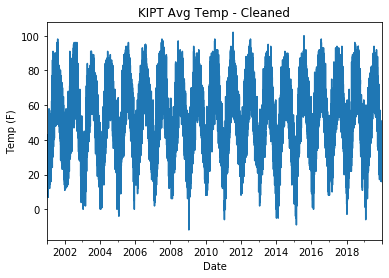

In [53]:
#Raw data
df_ave_temps["KIPT_GOOD"].plot()
plt.title("KIPT Avg Temp - Cleaned")
plt.xlabel("Date")
plt.ylabel("Temp (F)")

In [ ]:
# Plotly version
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ave_temps.index, y=df_ave_temps["KIPT_GOOD"], mode='lines'))

fig.update_layout(title="KIPT Avg Temp - Cleaned", xaxis_title="Date", yaxis_title="Temp (F)")
fig.show()

Text(0, 0.5, 'Temp (F)')

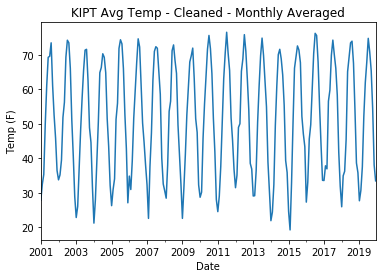

In [55]:
#Monthly
df_ave_temps["KIPT_GOOD"].resample('M').mean().plot()
plt.title("KIPT Avg Temp - Cleaned - Monthly Averaged")
plt.xlabel("Date")
plt.ylabel("Temp (F)")

Text(0, 0.5, 'Temp (F)')

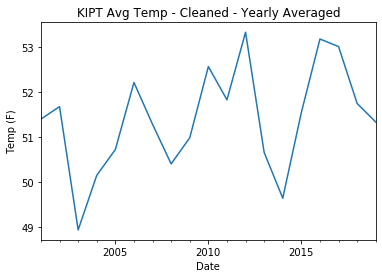

In [56]:
#Yearly
df_ave_temps["KIPT_GOOD"].resample('Y').mean().plot()
plt.title("KIPT Avg Temp - Cleaned - Yearly Averaged")
plt.xlabel("Date")
plt.ylabel("Temp (F)")